In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt



Mean of Z =  1.109778905261726
Standard Deviation of Z =  0.5532862584352148


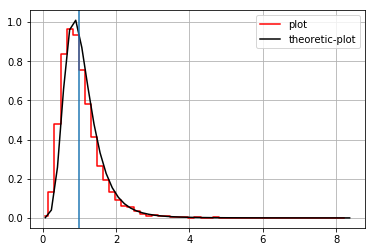

In [4]:
#parameters
'''
meanN = 10
sdN = 1
sdQ = 2
sdP = 1
Er = 10
V = 1
e = 1'''

meanN = 45454
sdN = 476
sdQ = 2
sdP = 7
Er = 149
V = 0.004
e = 0.003



k = 10000

#Z=X/Y
Ndata = np.random.normal(meanN,sdN,k)
Qdata = np.random.normal(0,sdQ,k)
Pdata = np.random.normal(0,sdP,k)
Zdata = (e*Ndata+Qdata) / (Er+Pdata-(V/e)*Qdata)

#Sample Statistics
meanZ = np.mean(Zdata)
sdZ = math.sqrt(np.mean((Zdata-np.mean(Zdata))**2))

print("Mean of Z = ", meanZ)
print("Standard Deviation of Z = ", sdZ)

#Normal Distribution approximation based on Estamted Parameters
def normf(x):
    ans = np.exp(-(((x-meanZ)/sdZ)**2)/2)/(sdZ*math.sqrt(2*math.pi))
    return ans

density = True
bins = 50
hist, bin_edges = np.histogram(Zdata, bins, density=density)

##Definitions

k = (sdP**2)*(sdQ**2)+(V**2)*(sdQ**2)*(sdN**2)+(e**2)*(sdN**2)*(sdP**2)

def g(x):
    ans = (1/math.sqrt(math.pi))+x*(np.exp(x**2))*math.erf(x)
    return ans
    
def A(x):
    ans = ((((x*(V/e)+1)*sdQ)**2)+((x*sdP)**2)+((e*sdN)**2))/(2*k)
    return ans
    
def B(x):
    ans = ((V/e)*(sdQ**2)*(Er*x+e*meanN)+x*e*meanN*(((V*sdQ/e)**2)+(sdP**2))+Er*((sdQ**2)+((e*sdN)**2)))/(k)
    return ans

C = ((((meanN*V+Er)*sdQ)**2)+(((meanN*sdP)**2)+((Er*sdN)**2))*(e**2))/(2*k)    

def f(x):
    ans = (1/(2*math.sqrt(math.pi*k)))*(1/A(x))*np.exp(-C)*g((B(x))/(2*math.sqrt(A(x))))
    return ans

fv = np.vectorize(f)
flist = fv(bin_edges)

normfv = np.vectorize(normf)
normlist = normfv(bin_edges)

plt.figure()
plt.plot(bin_edges[0:-1], (hist), drawstyle = "steps-mid", color="red", label = "plot")
plt.plot(bin_edges[0::], flist[0::] , color="black", label = "theoretic-plot")
plt.axvline(x = (e*meanN/Er))
plt.grid()
plt.legend()
plt.show()